# Comparison between L2 and L1 (Lasso) regularization

## Import libreries and define global variables

In [213]:
import numpy as np
from matplotlib import pyplot as plt
from NeuralNetwork import NeuralNetwork
from utils import get_data, onehot_encoding, grid_search, save_dict_to_file, load_dict_from_file, cross_validation
from Layer import Layer, Input
from functions import accuracy, MSE, MEE
import pandas as pd
import seaborn as sn
from matplotlib.colors import LogNorm, Normalize
from matplotlib.ticker import MaxNLocator

In [214]:
DIR = '/Users/HP/Desktop/UNI/LM_1/MachineLearning/ML_prj/' # Directory of the package.

## Import datasets

### Import MONK datasets

In [215]:
df = get_data(f'{DIR}data/MONK/monks-3.train')
df_test = get_data(f'{DIR}data/MONK/monks-3.test')

X_train_monk, y_train_monk = df.drop(columns=['target','id']).to_numpy().T, df['target'].apply(lambda x: int(x)).to_numpy().T
X_test_monk, y_test_monk = df_test.drop(columns=['target','id']).to_numpy().T, df_test['target'].apply(lambda x: int(x)).to_numpy().T

### Import CUP dataset

Define the fraction of dataset which will represent the internal test set.

In [216]:
test_frac = 1/4

In [217]:
names = ['id', 'feature_1', 'feature_2', 'feature_3', 'feature_4', 'feature_5', 'feature_6', 
         'feature_7', 'feature_8', 'feature_9', 'feature_10', 'target_x', 'target_y','target_z']

df = pd.read_csv(f"{DIR}data/ML-CUP23-TR.csv", names=names, comment='#')

targets = ['target_x', 'target_y', 'target_z']
features = list(set(names) - {'id', 'target_x', 'target_y', 'target_z'})

df = df.sample(frac=1)

train_test_div = round((1-test_frac) * df.shape[0])

X_train_cup, y_train_cup = df[:train_test_div][features].to_numpy().T, df[:train_test_div][targets].to_numpy().T
X_test_cup, y_test_cup = df[train_test_div:][features].to_numpy().T, df[train_test_div:][targets].to_numpy().T

## Data preprocessing

### MONK preprocessing

Process one hot encoding on training and test sets.

In [218]:
X_train_monk = onehot_encoding(X_train_monk)
X_test_monk = onehot_encoding(X_test_monk)

### CUP preprocessing

Decide which data preprocessing method apply to cup training set:
+ MinMax normalization (preprocessing = 1)
+ Standardization (preprocessing = 2)

In [219]:
preprocessing = 0

In [220]:
if preprocessing == 1:
    X_train_cup = minmax_norm(X_train_cup)
    X_test_cup = minmax_norm(X_test_cup)
elif preprocessing == 2:
    X_train_cup = standard(X_train_cup)
    X_test_cup = standard(X_test_cup)

## MONK

Define training and model hyperparameters

In [221]:
orig_params = {'hidden_dim': 3,
        'hidden_act_func': 'sigm',
        'eta': 0.01,
        'lam': 0.01,
        'alpha': 0.4,
        'n_batch': 97,
        'use_opt':1,
        'nest': False,
        'l1_reg' : False,
        'epochs' : 500
        }
seed = np.random.randint(10,1000)

### L2 regularization

Build model

In [222]:
params = orig_params.copy()
input_layer = Input(17)
hidden_layer = Layer(input_layer, params.pop('hidden_dim'), params.pop('hidden_act_func'), init_weights_mode='rand')
output_layer = Layer(hidden_layer, 1, 'sigm', init_weights_mode='rand')

model = NeuralNetwork(input_layer, output_layer, loss = 'binary_crossentropy', metrics = [accuracy, MSE])

init_weights_list = model.get_weights_list()

Training with L2 regularization:

In [223]:
np.random.seed(seed)
params['l1_reg'] = False
history_l2 = model.train(X_train_monk, y_train_monk.reshape((1,X_train_monk.shape[1])),
                                    validation_split = 0.2,
                                    early_stopping=None,
                                    reduce_eta=None,
                                    **params
                                    )

Epoch 0: train_loss: 7.068e-01, val_loss: 7.000e-01; train_accuracy: 5.052e+01, val_accuracy: 5.200e+01  train_MSE: 2.567e-01, val_MSE: 2.533e-01  lr : 0.01
Epoch 1: train_loss: 7.040e-01, val_loss: 6.980e-01; train_accuracy: 5.052e+01, val_accuracy: 5.200e+01  train_MSE: 2.554e-01, val_MSE: 2.524e-01  lr : 0.01
Epoch 2: train_loss: 7.016e-01, val_loss: 6.963e-01; train_accuracy: 5.052e+01, val_accuracy: 5.200e+01  train_MSE: 2.542e-01, val_MSE: 2.515e-01  lr : 0.01
Epoch 3: train_loss: 6.994e-01, val_loss: 6.948e-01; train_accuracy: 5.052e+01, val_accuracy: 5.200e+01  train_MSE: 2.531e-01, val_MSE: 2.508e-01  lr : 0.01
Epoch 4: train_loss: 6.975e-01, val_loss: 6.935e-01; train_accuracy: 5.052e+01, val_accuracy: 5.200e+01  train_MSE: 2.522e-01, val_MSE: 2.502e-01  lr : 0.01
Epoch 5: train_loss: 6.959e-01, val_loss: 6.924e-01; train_accuracy: 5.052e+01, val_accuracy: 5.200e+01  train_MSE: 2.514e-01, val_MSE: 2.496e-01  lr : 0.01
Epoch 6: train_loss: 6.945e-01, val_loss: 6.916e-01; train

Epoch 140: train_loss: 3.776e-01, val_loss: 4.250e-01; train_accuracy: 9.381e+01, val_accuracy: 9.200e+01  train_MSE: 1.030e-01, val_MSE: 1.238e-01  lr : 0.01
Epoch 141: train_loss: 3.754e-01, val_loss: 4.230e-01; train_accuracy: 9.381e+01, val_accuracy: 9.200e+01  train_MSE: 1.022e-01, val_MSE: 1.230e-01  lr : 0.01
Epoch 142: train_loss: 3.733e-01, val_loss: 4.210e-01; train_accuracy: 9.381e+01, val_accuracy: 9.200e+01  train_MSE: 1.013e-01, val_MSE: 1.222e-01  lr : 0.01
Epoch 143: train_loss: 3.713e-01, val_loss: 4.191e-01; train_accuracy: 9.381e+01, val_accuracy: 9.200e+01  train_MSE: 1.005e-01, val_MSE: 1.214e-01  lr : 0.01
Epoch 144: train_loss: 3.692e-01, val_loss: 4.172e-01; train_accuracy: 9.381e+01, val_accuracy: 9.200e+01  train_MSE: 9.971e-02, val_MSE: 1.206e-01  lr : 0.01
Epoch 145: train_loss: 3.673e-01, val_loss: 4.154e-01; train_accuracy: 9.381e+01, val_accuracy: 9.200e+01  train_MSE: 9.894e-02, val_MSE: 1.199e-01  lr : 0.01
Epoch 146: train_loss: 3.654e-01, val_loss: 4.

In [224]:
l2_weights = model.get_weights_list()

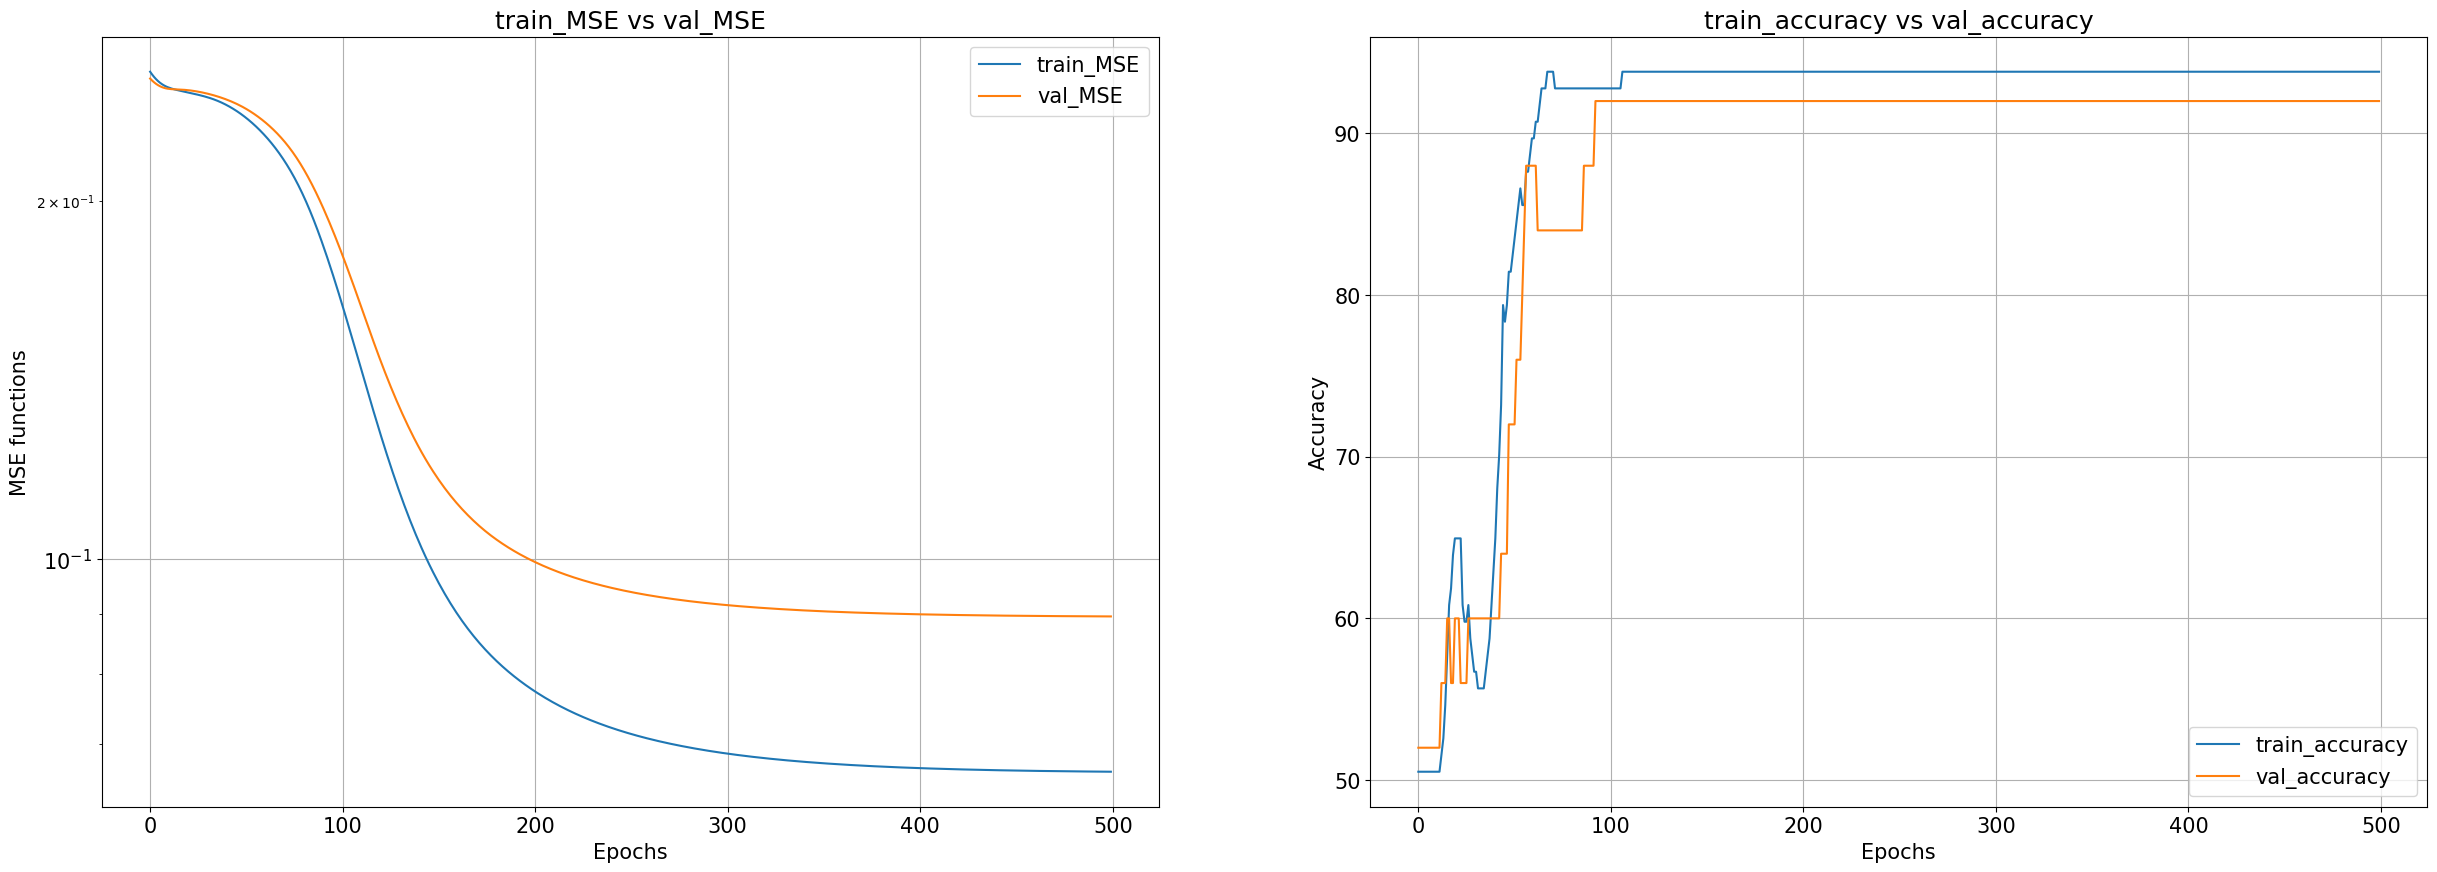

In [225]:
plt.figure(1,figsize=(30,10))
plt.subplot(1,2,1)
plt.plot(history_l2['train_MSE'],label='train_MSE')
plt.plot(history_l2['val_MSE'], label='val_MSE')
plt.yscale('log')
plt.xlabel('Epochs', size=15)
plt.ylabel('MSE functions', size=15)
plt.title('train_MSE vs val_MSE', size=18)
plt.xticks(size=15)
plt.yticks(size=15)
plt.grid()
plt.legend(fontsize=15)
plt.subplot(1,2,2)
plt.plot(history_l2['train_accuracy'],label='train_accuracy')
plt.plot(history_l2['val_accuracy'], label='val_accuracy')
plt.xlabel('Epochs', size=15)
plt.ylabel('Accuracy', size=15)
plt.title('train_accuracy vs val_accuracy', size=18)
plt.xticks(size=15)
plt.yticks(size=15)
plt.grid()
plt.legend(fontsize=15)

### L1 regularization


Build model


In [226]:
params = orig_params.copy()
input_layer = Input(17)
hidden_layer = Layer(input_layer, params.pop('hidden_dim'), params.pop('hidden_act_func'))
output_layer = Layer(hidden_layer, 1, 'sigm')

model = NeuralNetwork(input_layer, output_layer, loss = 'binary_crossentropy', metrics = [accuracy, MSE])

model.set_initial_weights(init_weights_list)

Training with L1 regularization:


In [227]:
np.random.seed(seed)
params['l1_reg'] = True
params['lam'] = params['lam']*0.5
history_l1 = model.train(X_train_monk, y_train_monk.reshape((1,X_train_monk.shape[1])),
                                    validation_split = 0.2,
                                    early_stopping=None,
                                    reduce_eta=None,
                                    **params
                                    )


Epoch 0: train_loss: 7.065e-01, val_loss: 6.996e-01; train_accuracy: 5.052e+01, val_accuracy: 5.200e+01  train_MSE: 2.566e-01, val_MSE: 2.531e-01  lr : 0.01
Epoch 1: train_loss: 7.036e-01, val_loss: 6.973e-01; train_accuracy: 5.052e+01, val_accuracy: 5.200e+01  train_MSE: 2.552e-01, val_MSE: 2.520e-01  lr : 0.01
Epoch 2: train_loss: 7.010e-01, val_loss: 6.953e-01; train_accuracy: 5.052e+01, val_accuracy: 5.200e+01  train_MSE: 2.539e-01, val_MSE: 2.510e-01  lr : 0.01
Epoch 3: train_loss: 6.986e-01, val_loss: 6.936e-01; train_accuracy: 5.052e+01, val_accuracy: 5.200e+01  train_MSE: 2.527e-01, val_MSE: 2.502e-01  lr : 0.01
Epoch 4: train_loss: 6.966e-01, val_loss: 6.922e-01; train_accuracy: 5.052e+01, val_accuracy: 5.200e+01  train_MSE: 2.517e-01, val_MSE: 2.495e-01  lr : 0.01
Epoch 5: train_loss: 6.949e-01, val_loss: 6.912e-01; train_accuracy: 5.052e+01, val_accuracy: 5.200e+01  train_MSE: 2.509e-01, val_MSE: 2.490e-01  lr : 0.01
Epoch 6: train_loss: 6.934e-01, val_loss: 6.903e-01; train

Epoch 11: train_loss: 6.885e-01, val_loss: 6.886e-01; train_accuracy: 5.258e+01, val_accuracy: 5.200e+01  train_MSE: 2.477e-01, val_MSE: 2.477e-01  lr : 0.01
Epoch 12: train_loss: 6.879e-01, val_loss: 6.885e-01; train_accuracy: 5.258e+01, val_accuracy: 5.600e+01  train_MSE: 2.474e-01, val_MSE: 2.477e-01  lr : 0.01
Epoch 13: train_loss: 6.873e-01, val_loss: 6.884e-01; train_accuracy: 5.258e+01, val_accuracy: 5.600e+01  train_MSE: 2.471e-01, val_MSE: 2.476e-01  lr : 0.01
Epoch 14: train_loss: 6.867e-01, val_loss: 6.883e-01; train_accuracy: 6.082e+01, val_accuracy: 5.600e+01  train_MSE: 2.468e-01, val_MSE: 2.476e-01  lr : 0.01
Epoch 15: train_loss: 6.862e-01, val_loss: 6.882e-01; train_accuracy: 5.979e+01, val_accuracy: 5.200e+01  train_MSE: 2.465e-01, val_MSE: 2.475e-01  lr : 0.01
Epoch 16: train_loss: 6.857e-01, val_loss: 6.880e-01; train_accuracy: 5.979e+01, val_accuracy: 6.400e+01  train_MSE: 2.463e-01, val_MSE: 2.474e-01  lr : 0.01
Epoch 17: train_loss: 6.851e-01, val_loss: 6.878e-01

In [228]:
l1_weights = model.get_weights_list()

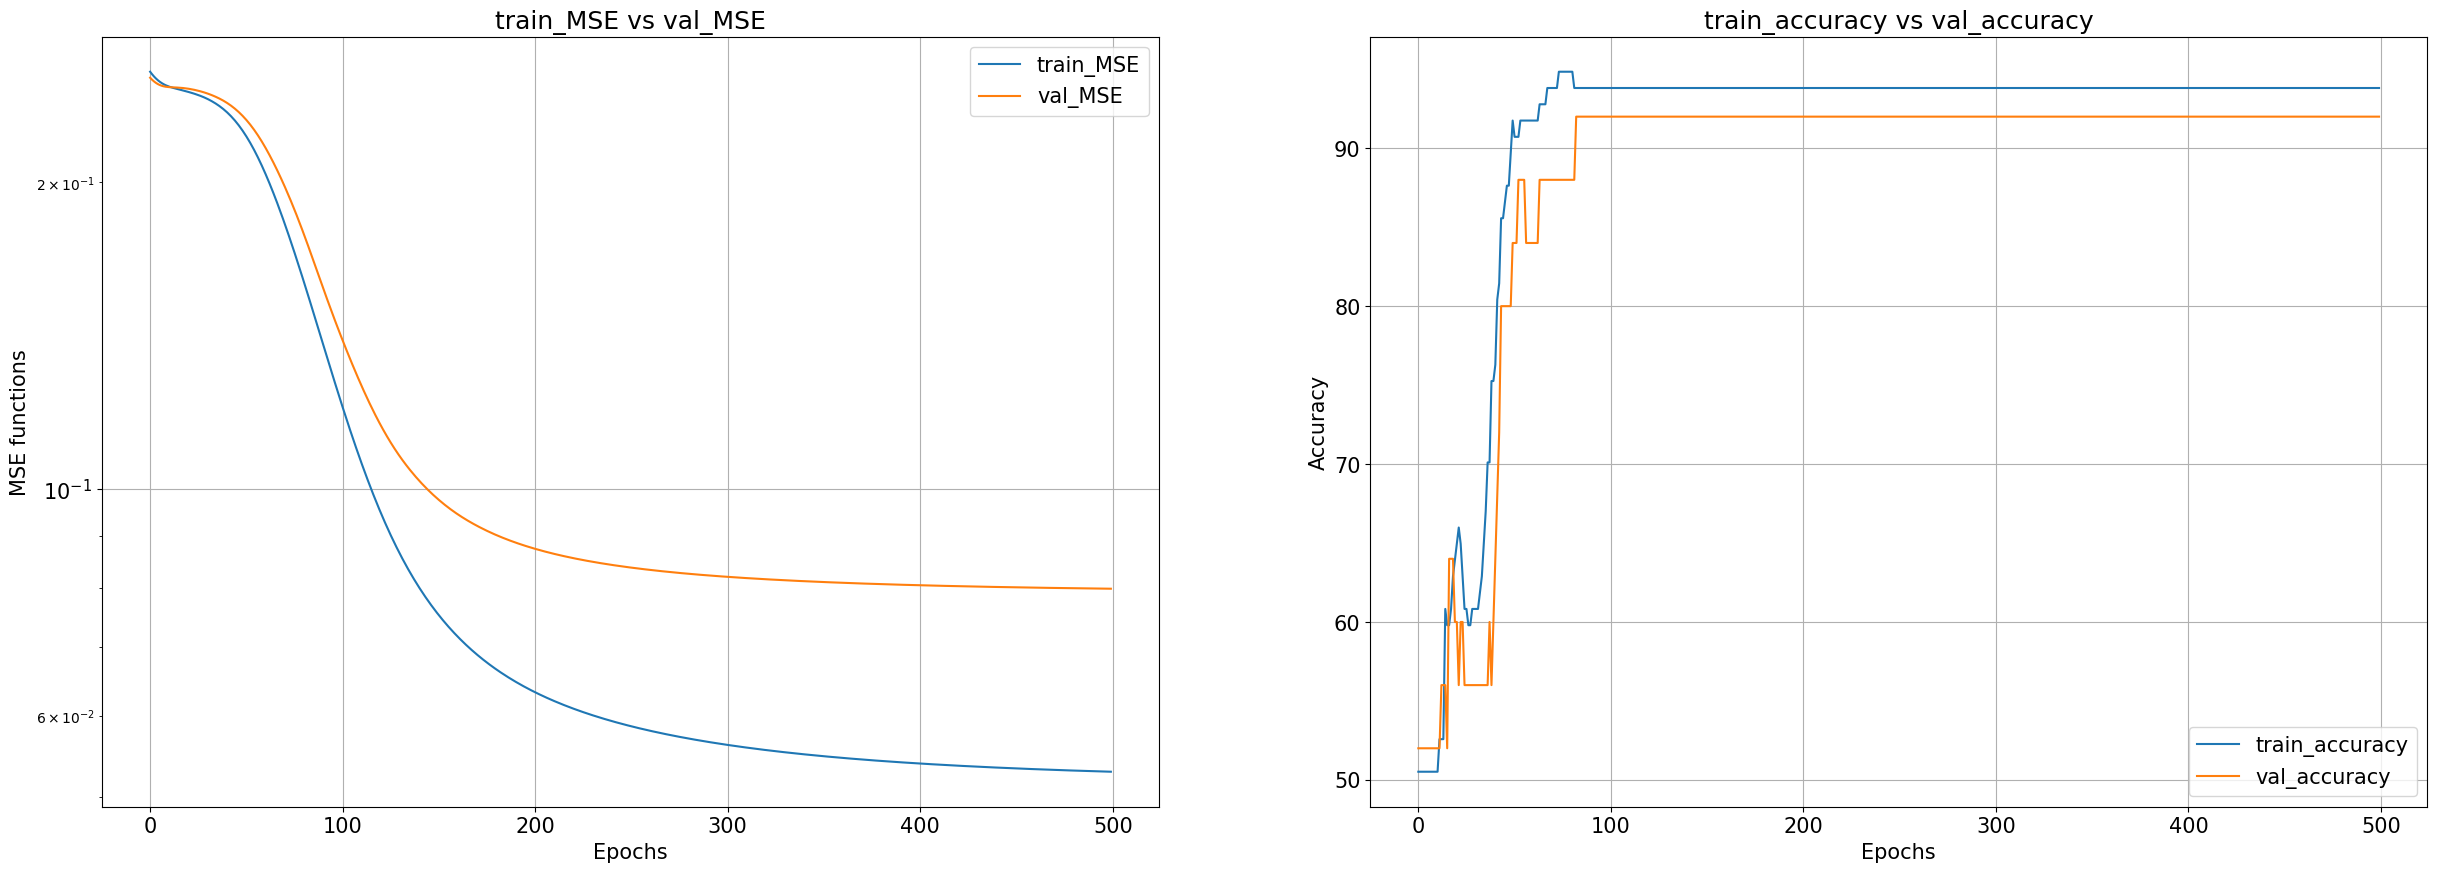

In [229]:
plt.figure(1,figsize=(30,10))
plt.subplot(1,2,1)
plt.plot(history_l1['train_MSE'],label='train_MSE')
plt.plot(history_l1['val_MSE'], label='val_MSE')
plt.yscale('log')
plt.xlabel('Epochs', size=15)
plt.ylabel('MSE functions', size=15)
plt.title('train_MSE vs val_MSE', size=18)
plt.xticks(size=15)
plt.yticks(size=15)
plt.grid()
plt.legend(fontsize=15)
plt.subplot(1,2,2)
plt.plot(history_l1['train_accuracy'],label='train_accuracy')
plt.plot(history_l1['val_accuracy'], label='val_accuracy')
plt.xlabel('Epochs', size=15)
plt.ylabel('Accuracy', size=15)
plt.title('train_accuracy vs val_accuracy', size=18)
plt.xticks(size=15)
plt.yticks(size=15)
plt.grid()
plt.legend(fontsize=15)


### Comparison

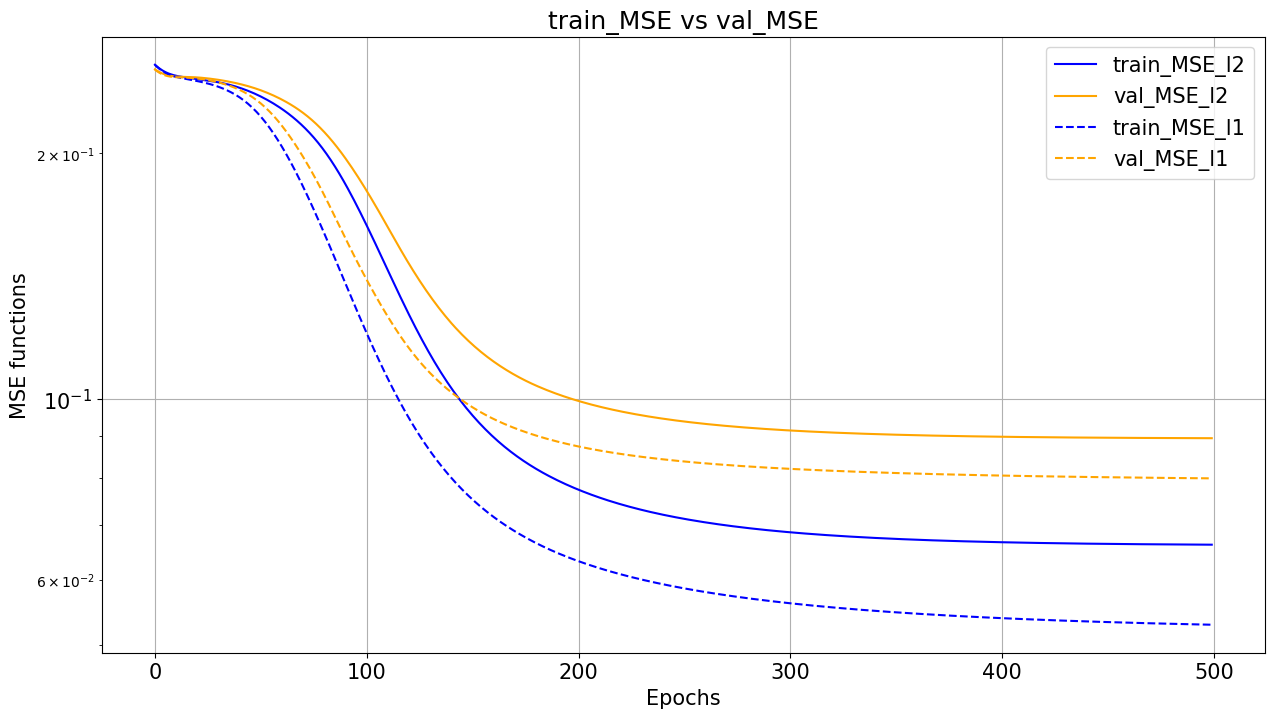

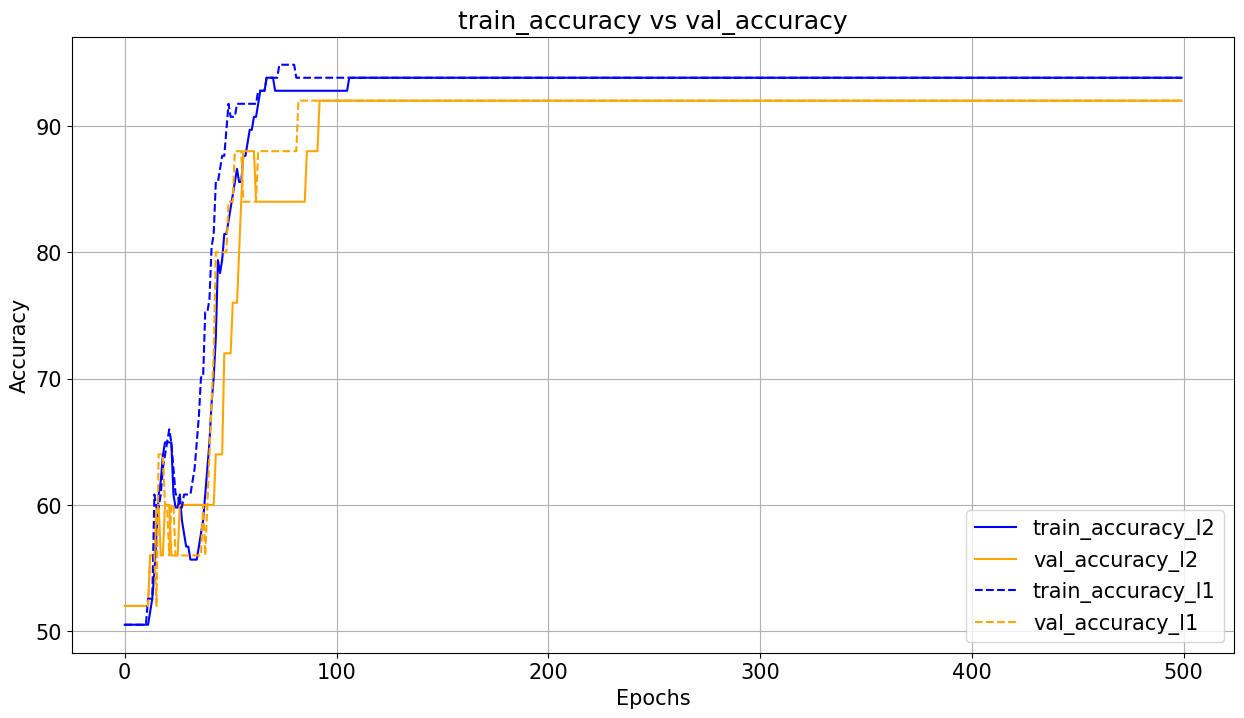

In [230]:
plt.figure(1,figsize=(15,8))

plt.plot(history_l2['train_MSE'], '-', label='train_MSE_l2', color='blue')
plt.plot(history_l2['val_MSE'], '-', label='val_MSE_l2', color='orange')
plt.plot(history_l1['train_MSE'], '--', label='train_MSE_l1', color='blue')
plt.plot(history_l1['val_MSE'], '--', label='val_MSE_l1', color='orange')
plt.yscale('log')
plt.xlabel('Epochs', size=15)
plt.ylabel('MSE functions', size=15)
plt.title('train_MSE vs val_MSE', size=18)
plt.xticks(size=15)
plt.yticks(size=15)
plt.grid()
plt.legend(fontsize=15)
plt.figure(2,figsize=(15,8))
plt.plot(history_l2['train_accuracy'], '-',label='train_accuracy_l2', color='blue')
plt.plot(history_l2['val_accuracy'], '-', label='val_accuracy_l2', color='orange')
plt.plot(history_l1['train_accuracy'], '--', label='train_accuracy_l1', color='blue')
plt.plot(history_l1['val_accuracy'], '--', label='val_accuracy_l1', color='orange')
plt.xlabel('Epochs', size=15)
plt.ylabel('Accuracy', size=15)
plt.title('train_accuracy vs val_accuracy', size=18)
plt.xticks(size=15)
plt.yticks(size=15)
plt.grid()
plt.legend(fontsize=15)

Text(158.22222222222223, 0.5, 'Layer units')

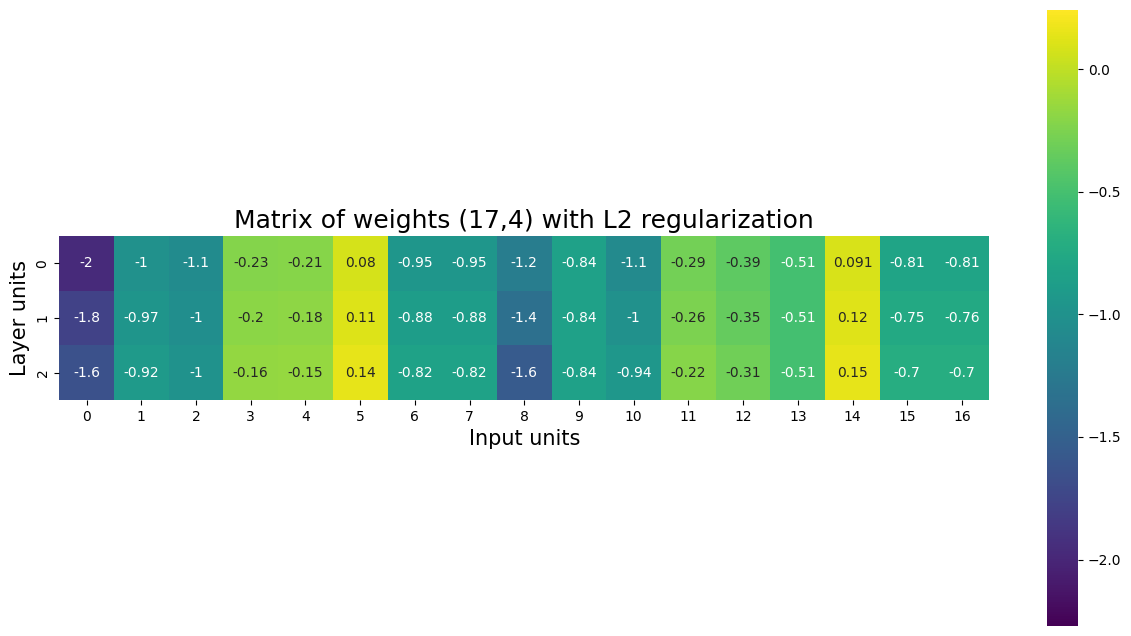

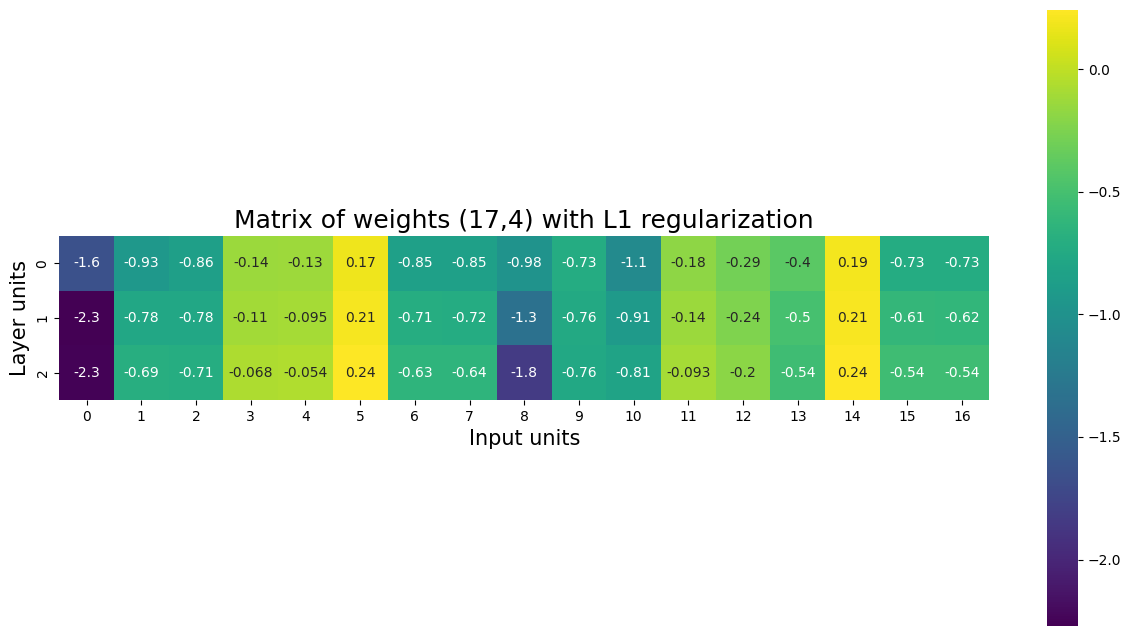

In [231]:
l2 = np.log10(np.abs(l2_weights[0][0]))
l1 = np.log10(np.abs(l1_weights[0][0]))

combined_min = min(np.min(l1), np.min(l2))
combined_max = max(np.max(l1), np.max(l2))

l2_norm = (l2 - np.min(l2)) / (np.max(l2) - np.min(l2))
l1_norm = (l1 - np.min(l1)) / (np.max(l1) - np.min(l1))

plt.figure(3,figsize=(15,8))
plt.title('Matrix of weights (17,4) with L2 regularization',size=18)
sn.heatmap(l2, annot=True,cmap='viridis',square=True,vmin=combined_min, vmax=combined_max)
plt.xlabel('Input units', size=15)
plt.ylabel('Layer units', size=15)
plt.figure(4,figsize=(15,8))
plt.title('Matrix of weights (17,4) with L1 regularization',size=18)
sn.heatmap(l1, annot=True,cmap='viridis',square=True,vmin=combined_min, vmax=combined_max)
plt.xlabel('Input units', size=15)
plt.ylabel('Layer units', size=15)

In [232]:
params = orig_params.copy()
params['loss'] = 'binary_crossentropy'
params['output_act_func'] = 'sigm'
params['scale_eta_batchsize'] = None
params['dim_hidden'] = params.pop('hidden_dim')
params['n_batch'] = 'batch'
print(params)
seed = np.random.randint(10,1000)
np.random.seed(seed)
params['l1_reg'] = False
history_cv_l2 = cross_validation(X_train_monk, y_train_monk.reshape(1,X_train_monk.shape[1]), folds=5, metrics=[MSE,accuracy], params=params.copy(), callbacks={'early_stopping':None, 'reduce_eta':None})
np.random.seed(seed)
params['l1_reg'] = True
params['lam'] = params['lam']*0.5
history_cv_l1 = cross_validation(X_train_monk, y_train_monk.reshape(1,X_train_monk.shape[1]), 5, [MSE,accuracy], params=params.copy(), callbacks={'early_stopping':None, 'reduce_eta':None})

{'hidden_act_func': 'sigm', 'eta': 0.01, 'lam': 0.01, 'alpha': 0.4, 'n_batch': 'batch', 'use_opt': 1, 'nest': False, 'l1_reg': False, 'epochs': 500, 'loss': 'binary_crossentropy', 'output_act_func': 'sigm', 'scale_eta_batchsize': None, 'dim_hidden': 3}


In [233]:
history_cv_l2

{'train_loss_mean': 0.27773662692486134,
 'train_loss_std': 0.024753077704203603,
 'val_loss_mean': 0.31745189655063977,
 'val_loss_std': 0.07046841271278534,
 'train_MSE_mean': 0.06876778632434088,
 'train_MSE_std': 0.0078020727193304175,
 'val_MSE_mean': 0.08159592620345273,
 'val_MSE_std': 0.02141971564747285,
 'train_accuracy_mean': 93.4438775510204,
 'train_accuracy_std': 0.48132556796206943,
 'val_accuracy_mean': 93.46153846153847,
 'val_accuracy_std': 1.9506569300901286}

In [234]:
history_cv_l1

{'train_loss_mean': 0.2197401067864254,
 'train_loss_std': 0.02168983334061829,
 'val_loss_mean': 0.2790272009990167,
 'val_loss_std': 0.09742739063276228,
 'train_MSE_mean': 0.05335770768930538,
 'train_MSE_std': 0.006715175220094929,
 'val_MSE_mean': 0.0702697288142253,
 'val_MSE_std': 0.026700988135598635,
 'train_accuracy_mean': 93.64795918367346,
 'train_accuracy_std': 0.7584728952713535,
 'val_accuracy_mean': 92.62820512820514,
 'val_accuracy_std': 3.0942354836274837}

## CUP

Define training and model hyperparameters

In [235]:
orig_params = {'hidden_dim': 30,
        'hidden_act_func': 'leaky_relu',
        'hidden_dim2': 30,
        'hidden_act_func2' : 'leaky_relu',
        'hidden_dim3': 30,
        'hidden_act_func3' : 'leaky_relu',
        'eta': 0.003,
        'lam': 0.05,
        'alpha': 0.06,
        'n_batch': 150,
        'use_opt':1,
        'nest': False,
        'l1_reg' : False,
        'epochs' : 500,
        'loss' : 'MSE',
        'output_act_func': 'lin'
        }

seed = np.random.randint(10,10000)

### L2 regularization

Build model

In [236]:
params = orig_params.copy()
input_layer = Input(X_train_cup.shape[0])
hidden_layer = Layer(input_layer, params.pop('hidden_dim'), params.pop('hidden_act_func'))
o = 2
while True:
    if f'hidden_dim{o}' in params.keys():
        hidden_layer = Layer(hidden_layer, params.pop(f'hidden_dim{o}'), params.pop(f'hidden_act_func{o}'))
        o += 1
    else: break
output_layer = Layer(hidden_layer, 3, params.pop('output_act_func'))

model = NeuralNetwork(input_layer, output_layer, params.pop('loss'), metrics=[MEE])

init_weights_list = model.get_weights_list()

Training with L2 regularization:

In [237]:
np.random.seed(seed)
params['l1_reg'] = False
history_l2 = model.train(X_train_cup, y_train_cup,
                                    ** params,
                                    validation_split = 0.2,
                                    early_stopping=None,
                                    reduce_eta=None
                                    )

Epoch 0: train_loss: 7.421e+02, val_loss: 7.027e+02; train_MEE: 4.184e+01, val_MEE: 4.025e+01  lr : 0.003
Epoch 1: train_loss: 7.175e+02, val_loss: 6.788e+02; train_MEE: 4.096e+01, val_MEE: 3.939e+01  lr : 0.003
Epoch 2: train_loss: 6.927e+02, val_loss: 6.554e+02; train_MEE: 4.006e+01, val_MEE: 3.852e+01  lr : 0.003
Epoch 3: train_loss: 6.667e+02, val_loss: 6.301e+02; train_MEE: 3.913e+01, val_MEE: 3.759e+01  lr : 0.003
Epoch 4: train_loss: 6.355e+02, val_loss: 6.002e+02; train_MEE: 3.802e+01, val_MEE: 3.653e+01  lr : 0.003
Epoch 5: train_loss: 5.982e+02, val_loss: 5.649e+02; train_MEE: 3.675e+01, val_MEE: 3.532e+01  lr : 0.003
Epoch 6: train_loss: 5.538e+02, val_loss: 5.237e+02; train_MEE: 3.524e+01, val_MEE: 3.396e+01  lr : 0.003
Epoch 7: train_loss: 5.036e+02, val_loss: 4.755e+02; train_MEE: 3.361e+01, val_MEE: 3.245e+01  lr : 0.003
Epoch 8: train_loss: 4.423e+02, val_loss: 4.186e+02; train_MEE: 3.152e+01, val_MEE: 3.061e+01  lr : 0.003
Epoch 9: train_loss: 3.732e+02, val_loss: 3.50

In [238]:
l2_weights = model.get_weights_list()

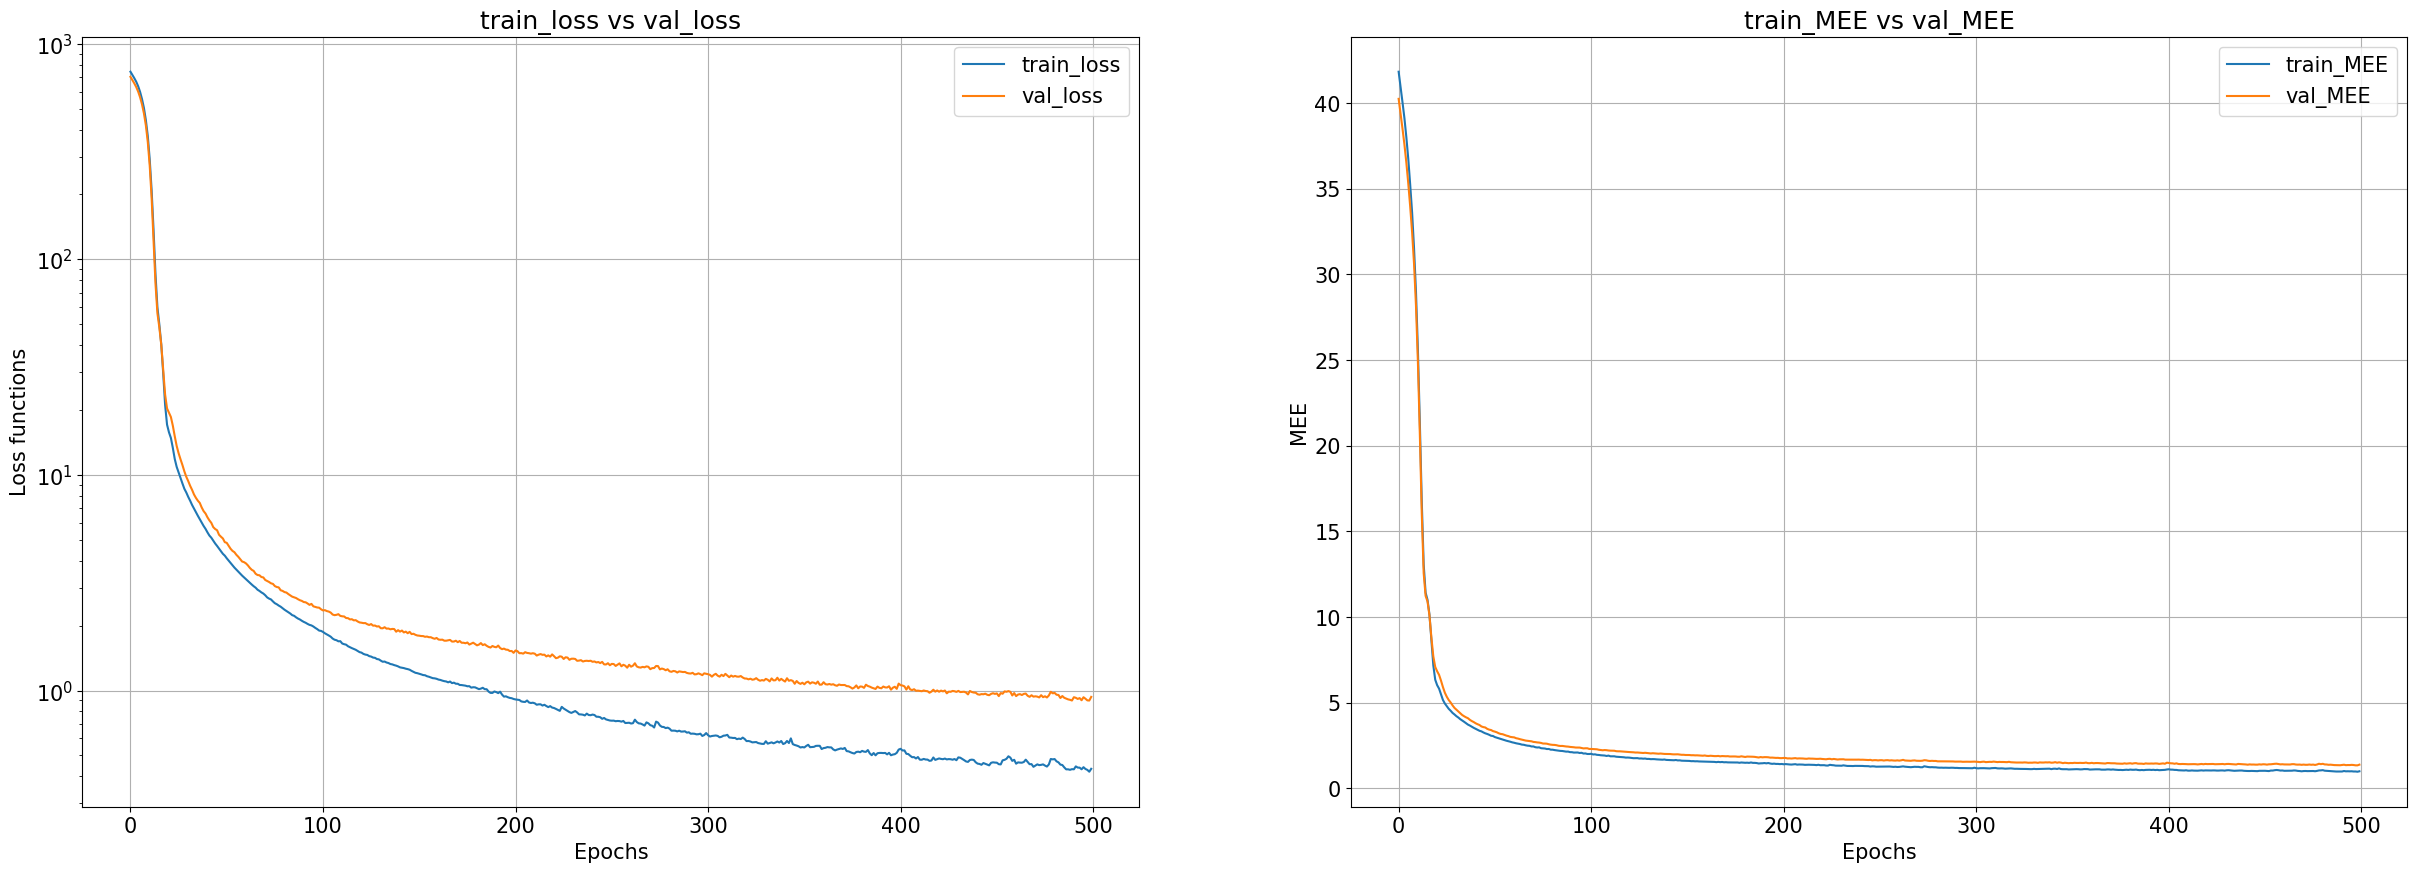

In [239]:
plt.figure(1,figsize=(30,10))
plt.subplot(1,2,1)
plt.plot(history_l2['train_loss'],label='train_loss')
plt.plot(history_l2['val_loss'], label='val_loss')
plt.yscale('log')
plt.xlabel('Epochs', size=15)
plt.ylabel('Loss functions', size=15)
plt.title('train_loss vs val_loss', size=18)
plt.xticks(size=15)
plt.yticks(size=15)
plt.grid()
plt.legend(fontsize=15)
plt.subplot(1,2,2)
plt.plot(history_l2['train_MEE'],label='train_MEE')
plt.plot(history_l2['val_MEE'], label='val_MEE')
plt.xlabel('Epochs', size=15)
plt.ylabel('MEE', size=15)
plt.title('train_MEE vs val_MEE', size=18)
plt.xticks(size=15)
plt.yticks(size=15)
plt.grid()
plt.legend(fontsize=15)

### L1 regularization


Build model


In [240]:
params = orig_params.copy()
input_layer = Input(X_train_cup.shape[0])
hidden_layer = Layer(input_layer, params.pop('hidden_dim'), params.pop('hidden_act_func'))
o = 2
while True:
    if f'hidden_dim{o}' in params.keys():
        hidden_layer = Layer(hidden_layer, params.pop(f'hidden_dim{o}'), params.pop(f'hidden_act_func{o}'))
        o += 1
    else: break
output_layer = Layer(hidden_layer, 3, params.pop('output_act_func'))

model = NeuralNetwork(input_layer, output_layer, params.pop('loss'), metrics=[MEE])

model.set_initial_weights(init_weights_list)

Training with L1 regularization:


In [241]:
np.random.seed(seed)
params['l1_reg'] = True
history_l1 = model.train(X_train_cup, y_train_cup,
                                    ** params,
                                    validation_split = 0.2,
                                    early_stopping=None,
                                    reduce_eta=None
                                    )

Epoch 0: train_loss: 7.421e+02, val_loss: 7.027e+02; train_MEE: 4.184e+01, val_MEE: 4.025e+01  lr : 0.003
Epoch 1: train_loss: 7.175e+02, val_loss: 6.788e+02; train_MEE: 4.096e+01, val_MEE: 3.939e+01  lr : 0.003
Epoch 2: train_loss: 6.927e+02, val_loss: 6.554e+02; train_MEE: 4.006e+01, val_MEE: 3.852e+01  lr : 0.003
Epoch 3: train_loss: 6.667e+02, val_loss: 6.301e+02; train_MEE: 3.913e+01, val_MEE: 3.759e+01  lr : 0.003
Epoch 4: train_loss: 6.355e+02, val_loss: 6.002e+02; train_MEE: 3.802e+01, val_MEE: 3.653e+01  lr : 0.003


KeyboardInterrupt: 

In [ ]:
l1_weights = model.get_weights_list()

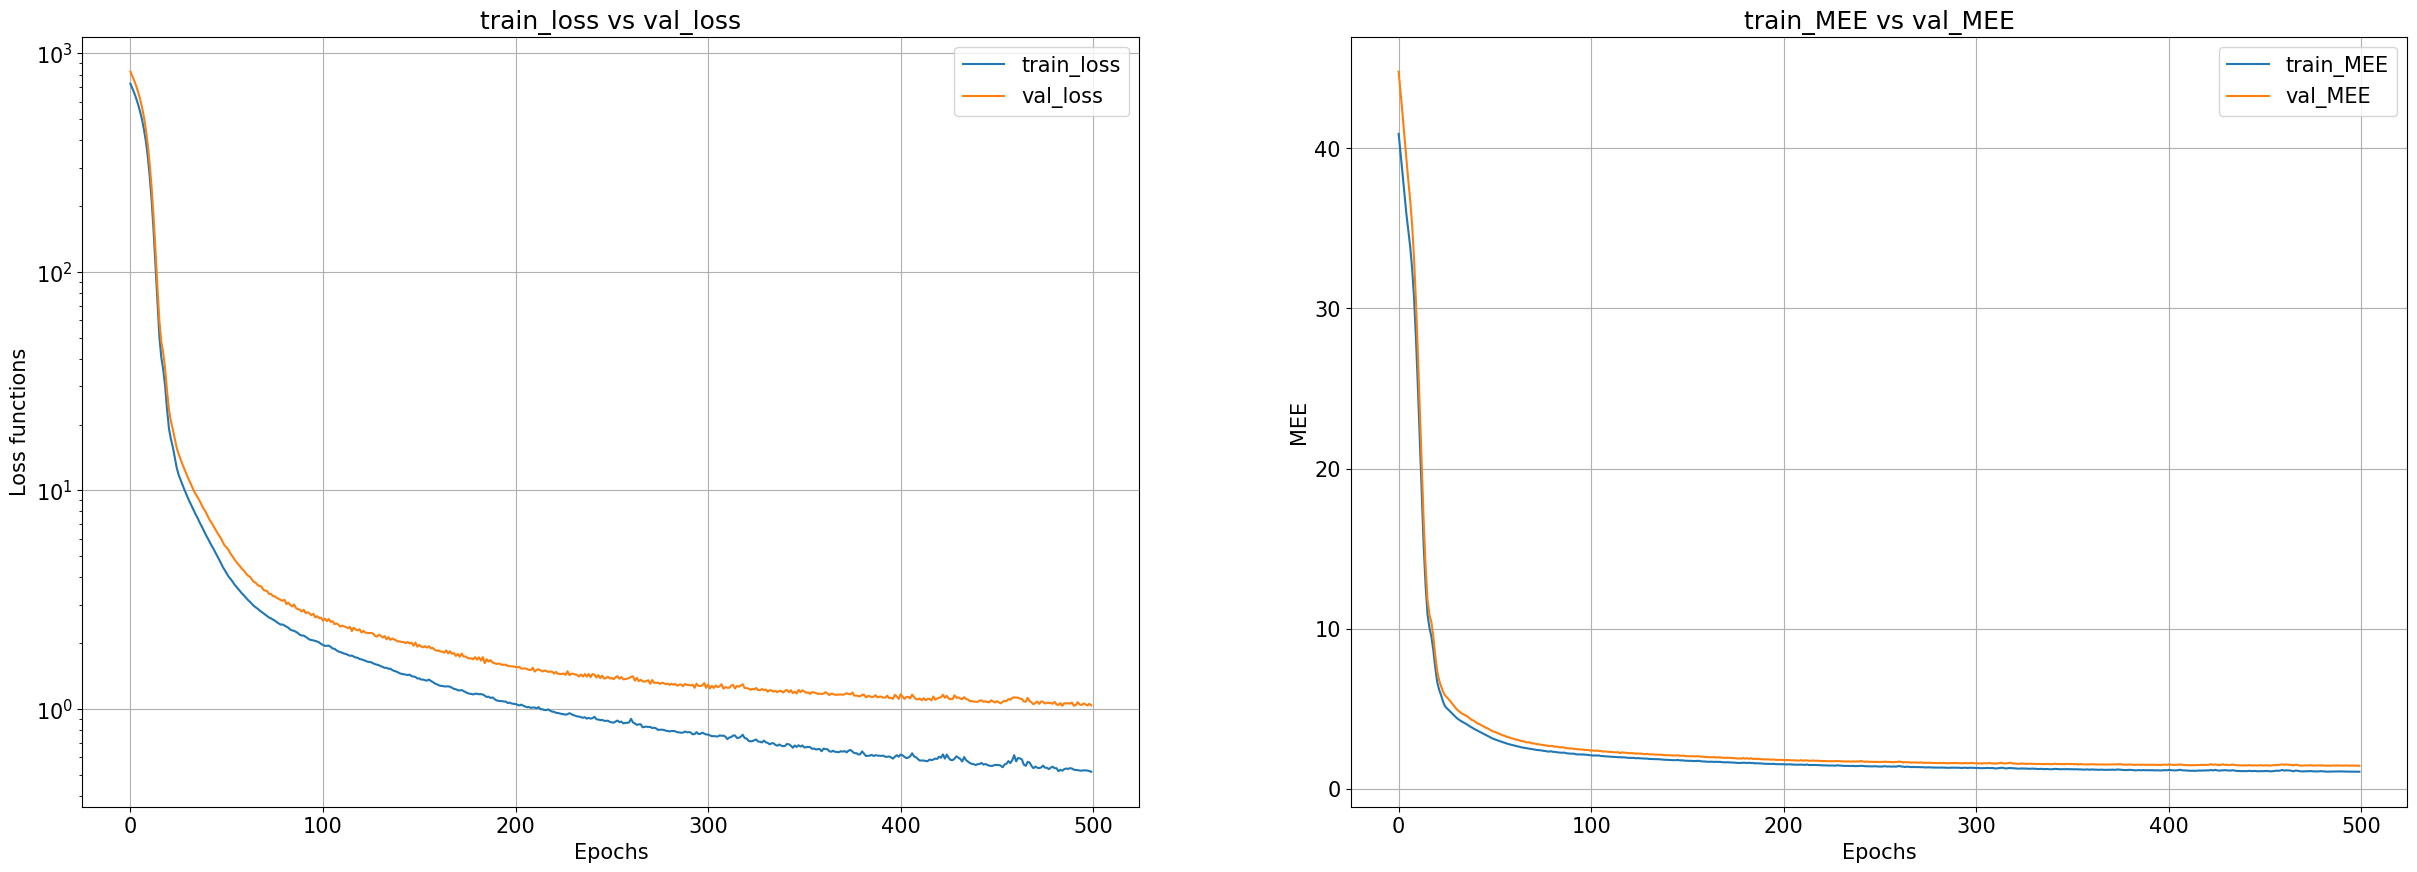

In [ ]:
plt.figure(1,figsize=(30,10))
plt.subplot(1,2,1)
plt.plot(history_l1['train_loss'],label='train_loss')
plt.plot(history_l1['val_loss'], label='val_loss')
plt.yscale('log')
plt.xlabel('Epochs', size=15)
plt.ylabel('Loss functions', size=15)
plt.title('train_loss vs val_loss', size=18)
plt.xticks(size=15)
plt.yticks(size=15)
plt.grid()
plt.legend(fontsize=15)
plt.subplot(1,2,2)
plt.plot(history_l1['train_MEE'],label='train_MEE')
plt.plot(history_l1['val_MEE'], label='val_MEE')
plt.xlabel('Epochs', size=15)
plt.ylabel('MEE', size=15)
plt.title('train_MEE vs val_MEE', size=18)
plt.xticks(size=15)
plt.yticks(size=15)
plt.grid()
plt.legend(fontsize=15)


### Comparison

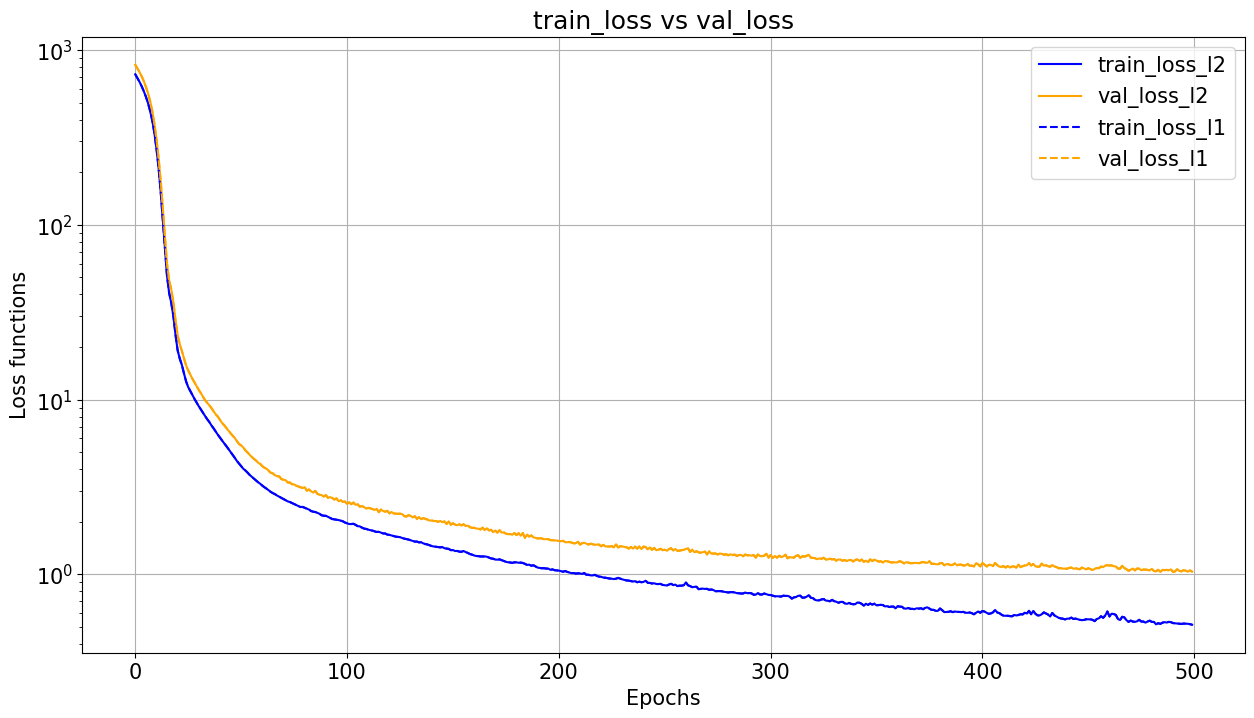

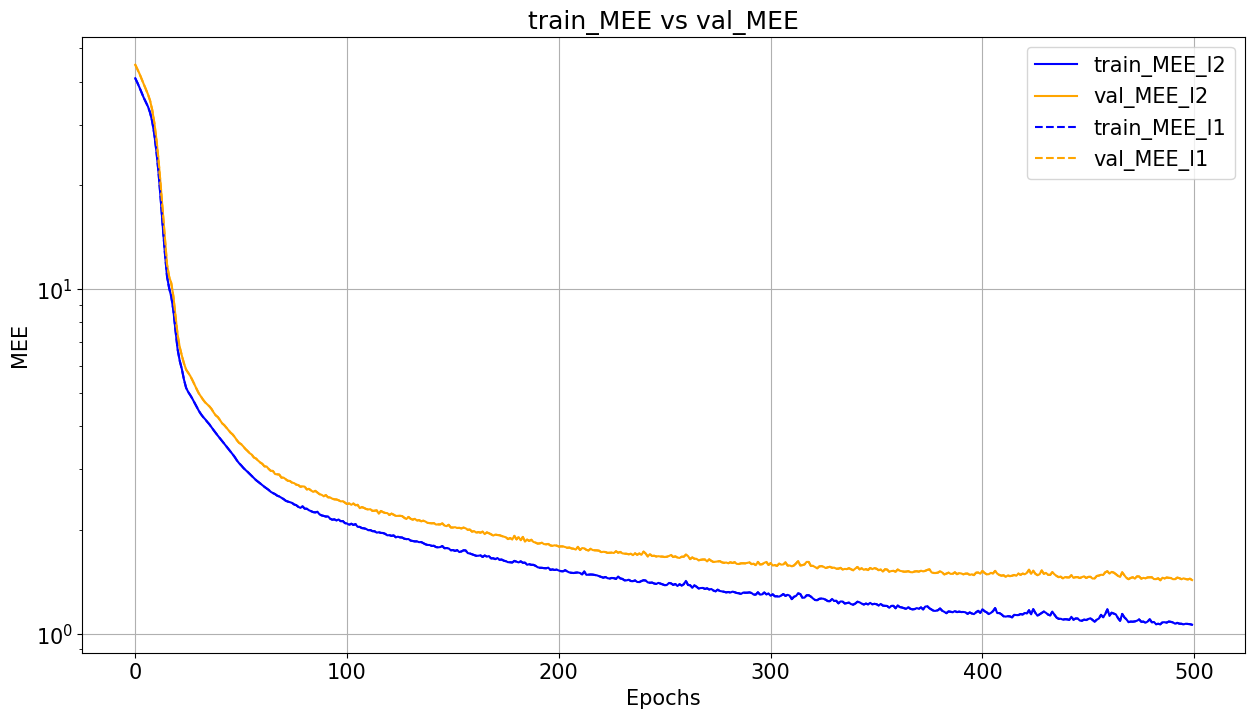

In [ ]:
plt.figure(1,figsize=(15,8))

plt.plot(history_l2['train_loss'], '-', label='train_loss_l2', color='blue')
plt.plot(history_l2['val_loss'], '-', label='val_loss_l2', color='orange')
plt.plot(history_l1['train_loss'], '--', label='train_loss_l1', color='blue')
plt.plot(history_l1['val_loss'], '--', label='val_loss_l1', color='orange')
plt.yscale('log')
plt.xlabel('Epochs', size=15)
plt.ylabel('Loss functions', size=15)
plt.title('train_loss vs val_loss', size=18)
plt.xticks(size=15)
plt.yticks(size=15)
plt.grid()
plt.legend(fontsize=15)
plt.figure(2,figsize=(15,8))
plt.plot(history_l2['train_MEE'], '-',label='train_MEE_l2', color='blue')
plt.plot(history_l2['val_MEE'], '-', label='val_MEE_l2', color='orange')
plt.plot(history_l1['train_MEE'], '--', label='train_MEE_l1', color='blue')
plt.plot(history_l1['val_MEE'], '--', label='val_MEE_l1', color='orange')
plt.yscale('log')
plt.xlabel('Epochs', size=15)
plt.ylabel('MEE', size=15)
plt.title('train_MEE vs val_MEE', size=18)
plt.xticks(size=15)
plt.yticks(size=15)
plt.grid()
plt.legend(fontsize=15)

Text(472.2222222222223, 0.5, 'Layer units')

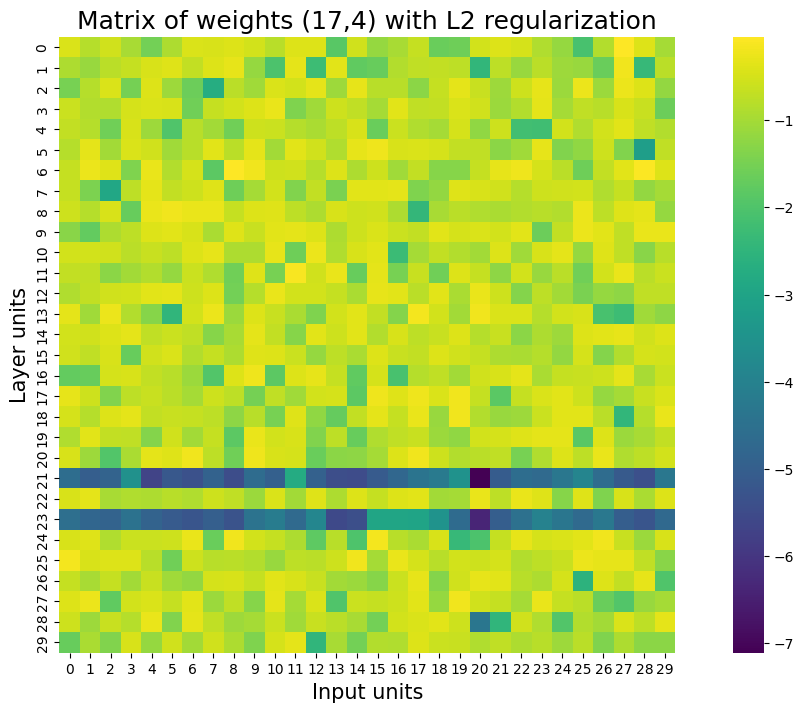

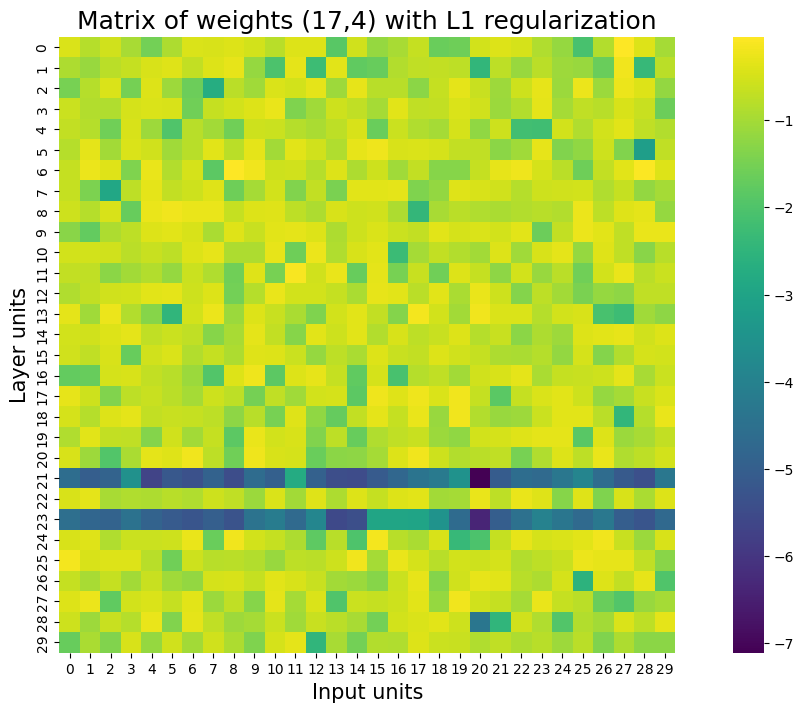

In [ ]:
l2 = np.log10(np.abs(l2_weights[1][0]))
l1 = np.log10(np.abs(l1_weights[1][0]))

combined_min = min(np.min(l1), np.min(l2))
combined_max = max(np.max(l1), np.max(l2))

l2_norm = (l2 - np.min(l2)) / (np.max(l2) - np.min(l2))
l1_norm = (l1 - np.min(l1)) / (np.max(l1) - np.min(l1))

plt.figure(3,figsize=(15,8))
plt.title('Matrix of weights (17,4) with L2 regularization',size=18)
sn.heatmap(l2, annot=False,cmap='viridis',square=True,vmin=combined_min, vmax=combined_max)
plt.xlabel('Input units', size=15)
plt.ylabel('Layer units', size=15)
plt.figure(4,figsize=(15,8))
plt.title('Matrix of weights (17,4) with L1 regularization',size=18)
sn.heatmap(l1, annot=False,cmap='viridis',square=True,vmin=combined_min, vmax=combined_max)
plt.xlabel('Input units', size=15)
plt.ylabel('Layer units', size=15)

In [ ]:
params = orig_params.copy()
params['loss'] = 'binary_crossentropy'
params['output_act_func'] = 'sigm'
params['scale_eta_batchsize'] = None
params['dim_hidden'] = params.pop('hidden_dim')
params['dim_hidden2'] = params.pop('hidden_dim2')
params['dim_hidden3'] = params.pop('hidden_dim3')
params['n_batch'] = 'batch'
print(params)
seed = np.random.randint(10,1000)
np.random.seed(seed)
params['l1_reg'] = False
history_cv_l2 = cross_validation(X_train_cup, y_train_cup, folds=5, metrics=[MSE,accuracy], params=params.copy(), callbacks={'early_stopping':None, 'reduce_eta':None})
np.random.seed(seed)
params['l1_reg'] = True
history_cv_l1 = cross_validation(X_train_cup, y_train_cup, 5, [MSE,accuracy], params=params.copy(), callbacks={'early_stopping':None, 'reduce_eta':None})

{'hidden_act_func': 'leaky_relu', 'hidden_dim2': 30, 'hidden_act_func2': 'leaky_relu', 'hidden_dim3': 30, 'hidden_act_func3': 'leaky_relu', 'eta': 0.003, 'lam': 0.05, 'alpha': 0.06, 'n_batch': 'batch', 'use_opt': 1, 'nest': False, 'l1_reg': False, 'epochs': 500, 'loss': 'binary_crossentropy', 'output_act_func': 'sigm', 'scale_eta_batchsize': None, 'dim_hidden': 30}


TypeError: NeuralNetwork.train() got an unexpected keyword argument 'hidden_dim2'

In [ ]:
history_cv_l2

In [ ]:
history_cv_l1